# Online Vehicle Booking Market Segmentation

**Objective**: Segment the Indian vehicle booking market using clustering models  
to help a startup identify high-potential customer segments and plan market entry.

---


In [1]:
import pandas as pd
df1 = pd.read_csv("data1.csv")
df3 = pd.read_csv("data2.csv")

In [2]:
import pandas as pd

# Step 1 - Load both datasets (one is All India level, one is city-wise)
df_national = pd.read_csv("data1.csv")
df_city = pd.read_csv("data2.csv")

# Step 2 - Clean the national dataset (remove missing values, rename columns)
df_national = df_national.dropna(subset=["Newly registered during 2019-20", "Total registered as on 31st March 2020"]).copy()
df_national.columns = ["Vehicle Type", "New Registered", "Total Registered"]
df_national["City"] = "All India"
df_national["Scope"] = "National"
df_national["Registered Count"] = df_national["Total Registered"]
df_national = df_national[["City", "Vehicle Type", "Registered Count", "Scope"]]

# Step 3 - Clean city-wise dataset
df_city = df_city.dropna().copy()
df_city = df_city.rename(columns={"Million Plus Cities": "City"})
df_city_long = df_city.melt(id_vars="City", var_name="Vehicle Type", value_name="Registered Count")
df_city_long["Scope"] = "City"

# Step 4 - Merge both into one dataset
big_data = pd.concat([df_national, df_city_long], ignore_index=True)

# Step 5 - Check the merged data
big_data.head(11)

,City,Vehicle Type,Registered Count,Scope
0,All India,I.Multiaxled / Articulated Vehicles,1632594.0,National
1,All India,II.Trucks and Lorries,5826471.0,National
2,All India,a) Four Wheelers,4697352.0,National
3,All India,b) Three Wheelers,2131844.0,National
4,All India,Total III,6829196.0,National
5,All India,a) Stage carriages,983662.0,National
6,All India,b) Contract carriages,339112.0,National
7,All India,c) Private service vehicles,133754.0,National
8,All India,d) Other buses,266895.0,National
9,All India,Total IV,1723423.0,National


In [3]:
# Check the total number of unique cities and vehicle types
print("Total rows in data:", big_data.shape[0])
print("Unique cities:", big_data['City'].nunique())
print("Unique vehicle types:", big_data['Vehicle Type'].nunique())

Total rows in data: 864
Unique cities: 53
Unique vehicle types: 48


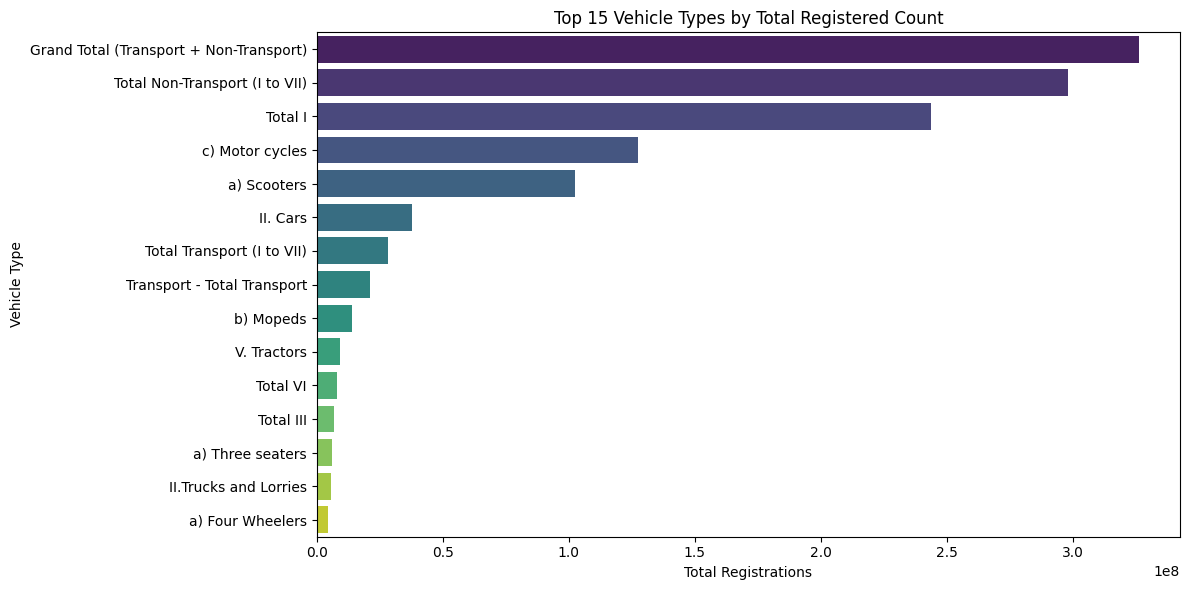

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by vehicle type and sum up registrations
top_vehicles = big_data.groupby("Vehicle Type")["Registered Count"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_vehicles.index, x=top_vehicles.values, hue=top_vehicles.index, 
            dodge=False, palette="viridis", legend=False)

plt.title("Top 15 Vehicle Types by Total Registered Count")
plt.xlabel("Total Registrations")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()


In [5]:
city_data = big_data[big_data["Scope"] == "City"]
pivot_df = city_data.pivot_table(index="City", columns="Vehicle Type", values="Registered Count", aggfunc="sum").fillna(0)
pivot_df.shape


(52, 16)

## Exploratory Data Analysis (EDA)

We analyze trip patterns, customer demographics, and behavior before clustering.


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

In [7]:
from sklearn.cluster import KMeans

# Try with 3 clusters to start (you can try 4, 5, etc. later)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to pivot_df
pivot_df["Cluster"] = clusters
pivot_df.head()

Vehicle Type,Transport - Buses - Contract carriage,Transport - Buses - Other Buses,Transport - Buses - Private Service,Transport - Buses - Stage carriage,Transport - Light Motor Vehicles (Goods) - Four Wheelers,Transport - Light Motor Vehicles (Goods) - Three Wheelers,Transport - Light Motor Vehicles (Passengers-Auto) - Four to Six Seaters,Transport - Light Motor Vehicles (Passengers-Auto) - Three Seaters,Transport - Motor Cycles on Hire,Transport - Multi-axled/Articulated Vehicles,Transport - Other vehicles not covered,Transport - Taxies - Maxi cab,Transport - Taxies - Motor cab,Transport - Taxies - Other taxis,Transport - Total Transport,Transport - Trucks & Lorries,Cluster
City,,,,,,,,,,,,,,,,,
Agra,566.0,1070.0,511.0,228.0,2615.0,14651.0,6810.0,14055.0,27.0,3992.0,0.0,889.0,5143.0,148.0,54261.0,3556.0,0
Ahmedabad,8203.0,1645.0,1201.0,21028.0,44242.0,74207.0,0.0,210182.0,0.0,3498.0,0.0,6925.0,0.0,24616.0,450099.0,54352.0,0
Aurangabad,2374.0,1683.0,2004.0,5996.0,34162.0,32099.0,0.0,35444.0,0.0,7.0,0.0,0.0,59.0,3417.0,133713.0,16468.0,0
Bengaluru,0.0,0.0,0.0,116877.0,166800.0,60622.0,70508.0,289391.0,0.0,15102.0,0.0,54783.0,196416.0,130.0,1141712.0,171083.0,2
Bhopal,2149.0,492.0,0.0,3111.0,15268.0,0.0,0.0,21125.0,0.0,4984.0,0.0,2972.0,12799.0,0.0,83161.0,20261.0,0


In [8]:
# Create a table showing cities grouped by their cluster
clustered_cities = pivot_df.reset_index()[["City", "Cluster"]]
print(clustered_cities.sort_values(by="Cluster"))

Vehicle Type                City  Cluster
0                           Agra        0
1                      Ahmedabad        0
2                    Aurangabad         0
4                         Bhopal        0
6                        Chennai        0
5                    Chandigarh         0
7                     Coimbatore        0
8                          Delhi        0
12                    Ghaziabad         0
9                        Dhanbad        0
10                   Durg Bhilai        0
11                     Faridabad        0
14                     Gwalior          0
13                Greater Mumbai        0
15                     Hyderabad        0
16                        Indore        0
24                        Kochi         0
17                      Jabalpur        0
18                        Jaipur        0
19                    Jamshedpur        0
20                       Jodhpur        0
21              Kalyan Dombivali        0
22                        Kannur  

In [9]:
# Remove cluster column temporarily to avoid it skewing the average
features_only = pivot_df.drop(columns="Cluster")

# Add the cluster column back for grouping
features_only["Cluster"] = pivot_df["Cluster"]

# Group by cluster and get average vehicle registration per type
cluster_profile = features_only.groupby("Cluster").mean().T  # .T to transpose

# Show top 5 vehicle types for each cluster
for cluster in cluster_profile.columns:
    print(f"\nTop 5 vehicle types for Cluster {cluster}:")
    print(cluster_profile[cluster].sort_values(ascending=False).head(5))


Top 5 vehicle types for Cluster 0:
Vehicle Type
Transport - Total Transport                                           183639.34
Transport - Light Motor Vehicles (Passengers-Auto) - Three Seaters     39138.58
Transport - Trucks & Lorries                                           35149.66
Transport - Multi-axled/Articulated Vehicles                           25146.66
Transport - Light Motor Vehicles (Goods) - Four Wheelers               21317.48
Name: 0, dtype: float64

Top 5 vehicle types for Cluster 1:
Vehicle Type
Transport - Total Transport                                           10662844.0
Transport - Light Motor Vehicles (Passengers-Auto) - Three Seaters     2318719.0
Transport - Trucks & Lorries                                           2014320.0
Transport - Multi-axled/Articulated Vehicles                           1274305.0
Transport - Light Motor Vehicles (Goods) - Four Wheelers               1265032.0
Name: 1, dtype: float64

Top 5 vehicle types for Cluster 2:
Vehicle Type


In [10]:
# Add cluster numbers to city names for your final report
cluster_table = pivot_df.reset_index()[["City", "Cluster"]]
cluster_table.to_csv("city_clusters.csv", index=False)  # You can upload this to GitHub
# Show the first few rows of the cluster table
cluster_table.head(10)

Vehicle Type,City,Cluster
0,Agra,0
1,Ahmedabad,0
2,Aurangabad,0
3,Bengaluru,2
4,Bhopal,0
5,Chandigarh,0
6,Chennai,0
7,Coimbatore,0
8,Delhi,0
9,Dhanbad,0


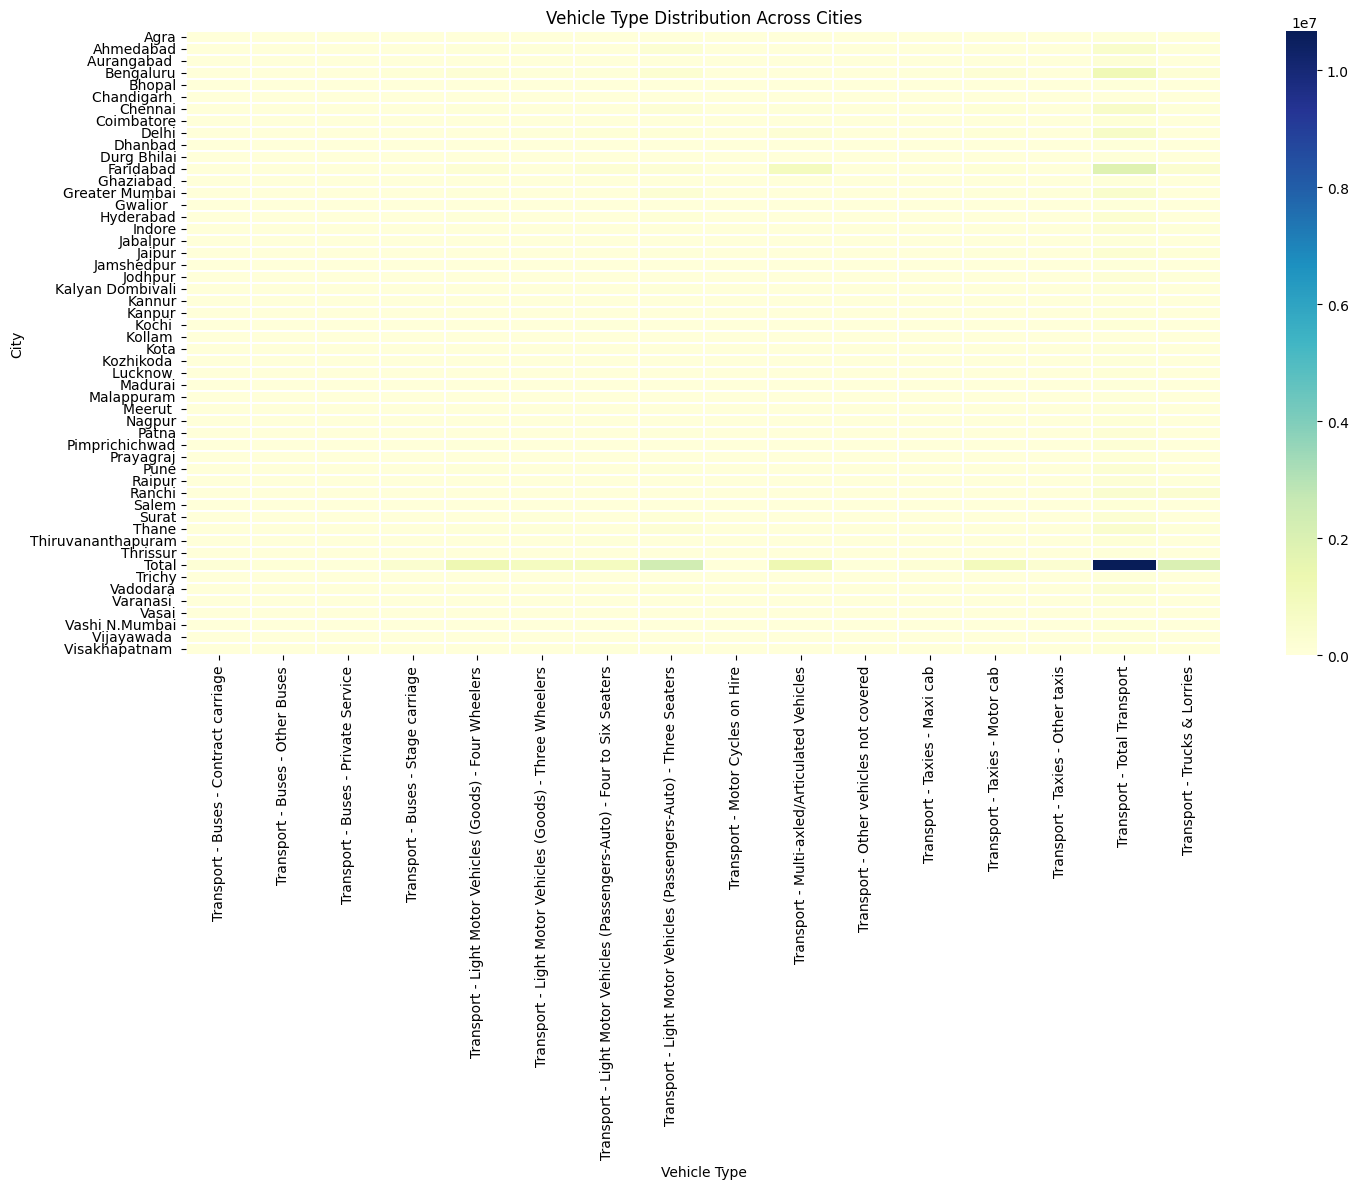

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap
heatmap_data = big_data[big_data["Scope"] == "City"].pivot_table(
    index="City", 
    columns="Vehicle Type", 
    values="Registered Count", 
    aggfunc="sum"
).fillna(0)

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.2)
plt.title("Vehicle Type Distribution Across Cities")
plt.xlabel("Vehicle Type")
plt.ylabel("City")
plt.tight_layout()
plt.show()

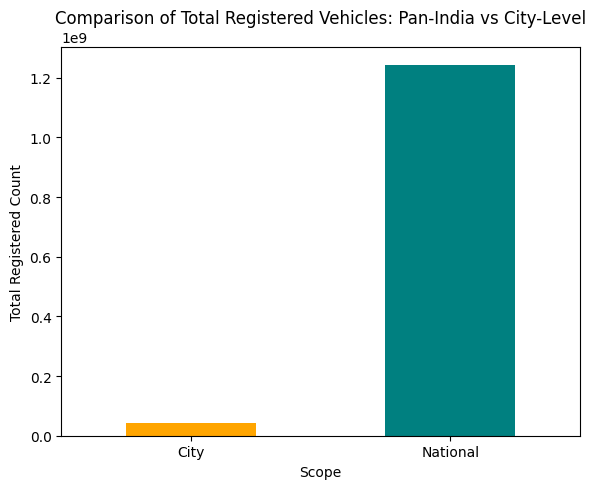

In [12]:
# Sum vehicle count by scope
scope_comparison = big_data.groupby("Scope")["Registered Count"].sum()

# Plot
plt.figure(figsize=(6,5))
scope_comparison.plot(kind="bar", color=["orange", "teal"])
plt.title("Comparison of Total Registered Vehicles: Pan-India vs City-Level")
plt.ylabel("Total Registered Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


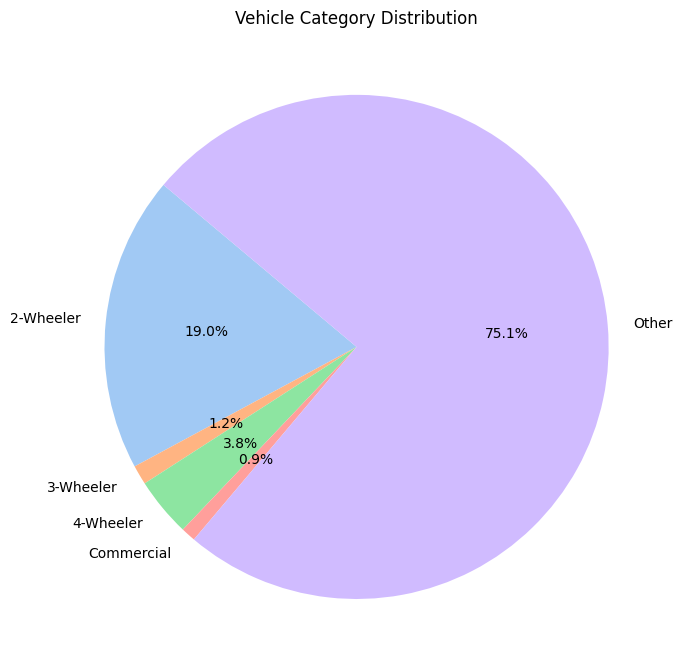

In [13]:

data = big_data.copy()

# Function to group vehicle types
def categorize_vehicle(v):
    v = v.lower()
    if "motor cycle" in v or "scooter" in v or "moped" in v:
        return "2-Wheeler"
    elif "three" in v or "auto" in v:
        return "3-Wheeler"
    elif "car" in v or "cab" in v or "taxi" in v or "jeep" in v:
        return "4-Wheeler"
    elif "truck" in v or "lorry" in v or "trailer" in v:
        return "Commercial"
    else:
        return "Other"

# Apply new category
data["Category"] = data["Vehicle Type"].apply(categorize_vehicle)

# Group by new category
category_totals = data.groupby("Category")["Registered Count"].sum()

# Pie chart
plt.figure(figsize=(7,7))
category_totals.plot.pie(autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Vehicle Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
df_main = pd.read_csv("sigma_cabs.csv")
df_test = pd.read_csv("test.csv")

# Quick checks
print("Main shape:", df_main.shape)
print("Test shape:", df_test.shape)
print("\nMain columns:\n", df_main.columns.tolist())
print("\nTest columns:\n", df_test.columns.tolist())

Main shape: (131662, 14)
Test shape: (87395, 13)

Main columns:
 ['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months', 'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type', 'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Gender', 'Surge_Pricing_Type']

Test columns:
 ['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months', 'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type', 'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Gender']


In [15]:
common_cols = df_main.columns.intersection(df_test.columns)
df_main = df_main[common_cols]
df_test = df_test[common_cols]
# Stack one on top of the other
merged_df = pd.concat([df_main, df_test], ignore_index=True)
# Stack one on top of the other
merged_df = pd.concat([df_main, df_test], ignore_index=True)

print("Final merged shape:", merged_df.shape)
merged_df.head()
merged_df.to_csv("final_customer_data.csv", index=False)
print("✅ Final dataset saved as 'final_customer_data.csv'")

Final merged shape: (219057, 13)
✅ Final dataset saved as 'final_customer_data.csv'


In [16]:
import pandas as pd

# Load the cleaned, merged file you saved earlier
df = pd.read_csv("final_customer_data.csv")


In [17]:
merged_df[["Var1", "Var2", "Var3"]].head(10)
merged_df[["Var1", "Var2", "Var3"]].describe()
merged_df = merged_df.drop(columns=["Var1", "Var2", "Var3"])

In [18]:
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

Available columns in merged_df:
['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months', 'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type', 'Customer_Rating', 'Cancellation_Last_1Month', 'Gender']


In [19]:
merged_df.info()
merged_df.isnull().sum()
merged_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Gender                       219057 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 16.7+ MB


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender
count,219057,219057.000000,185689,209171.000000,185537.000000,185537,219057,219057.000000,219057.000000,219057
unique,219057,NaN,5,NaN,NaN,3,14,NaN,NaN,2
top,T0005908515,NaN,B,NaN,NaN,B,A,NaN,NaN,Male
freq,1,NaN,51585,NaN,NaN,67265,129010,NaN,NaN,156128
mean,NaN,44.158725,NaN,6.006048,2.802594,NaN,NaN,2.848632,0.782915,NaN
std,NaN,25.507368,NaN,3.626891,0.226323,NaN,NaN,0.981100,1.036244,NaN
min,NaN,0.310000,NaN,0.000000,1.317850,NaN,NaN,0.001250,0.000000,NaN
25%,NaN,24.560000,NaN,3.000000,2.654620,NaN,NaN,2.152500,0.000000,NaN
50%,NaN,38.140000,NaN,6.000000,2.798280,NaN,NaN,2.895000,0.000000,NaN
75%,NaN,60.720000,NaN,10.000000,2.947650,NaN,NaN,3.581250,1.000000,NaN


C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


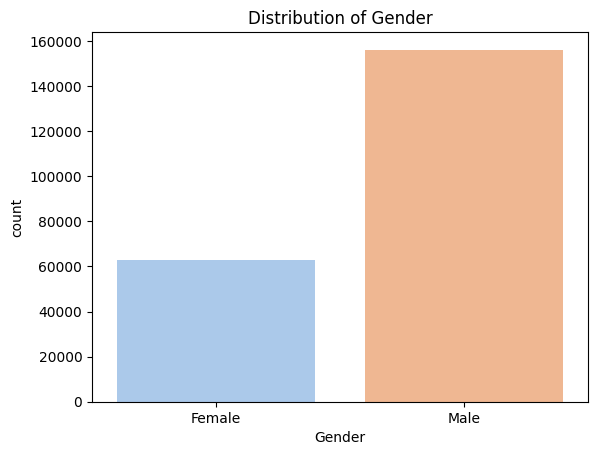

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Type_of_Cab", palette="muted")


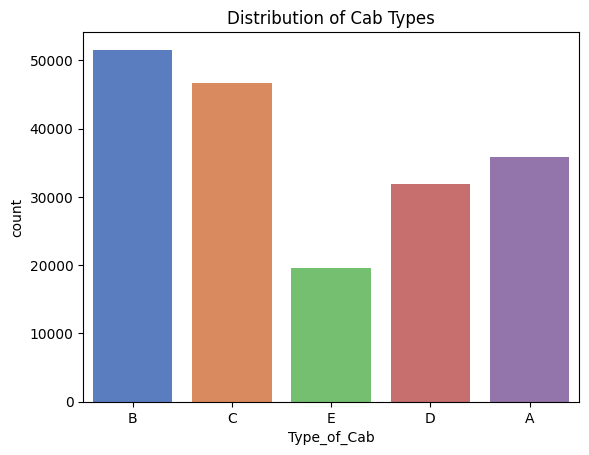

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Destination_Type", palette="Set2")


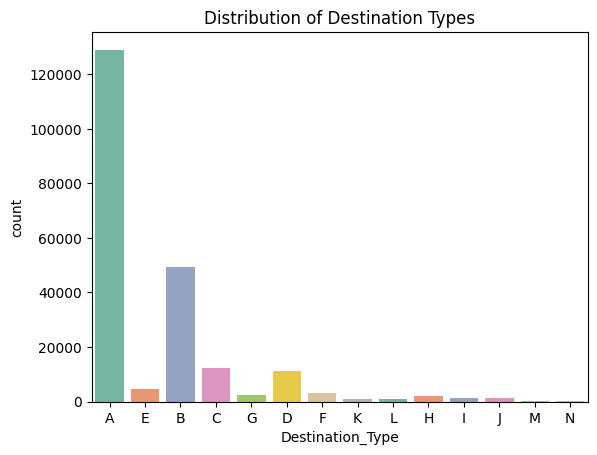

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gender Distribution
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Distribution of Gender")
plt.show()

## Cab Type
sns.countplot(data=df, x="Type_of_Cab", palette="muted")
plt.title("Distribution of Cab Types")
plt.show()

## Destination Type
sns.countplot(data=df, x="Destination_Type", palette="Set2")
plt.title("Distribution of Destination Types")
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# Drop Trip_ID if it exists
df = df.drop(columns=["Trip_ID"], errors="ignore")

# Drop rows with null values
df = df.dropna()
label_cols = ["Type_of_Cab", "Confidence_Life_Style_Index", "Destination_Type", "Gender"]
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


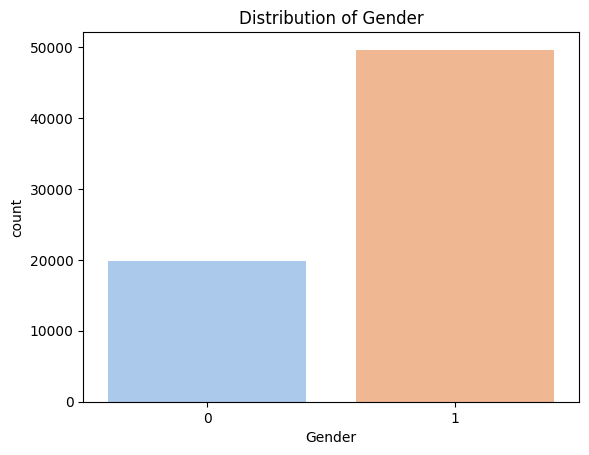

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Type_of_Cab", palette="muted")


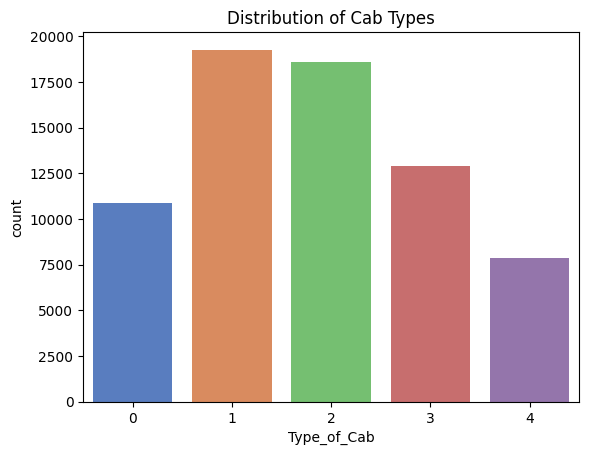

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\1479594484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Destination_Type", palette="Set2")


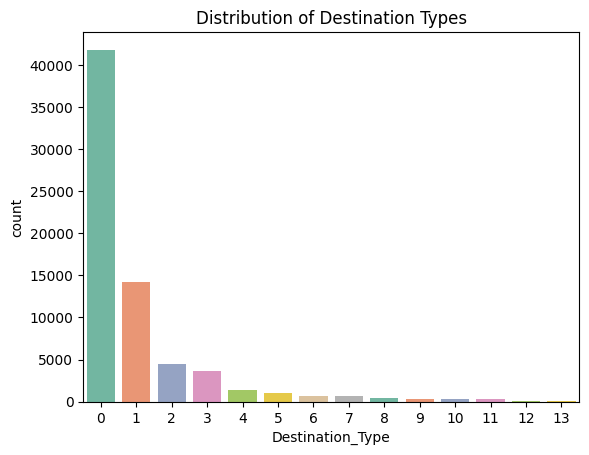

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gender Distribution
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Distribution of Gender")
plt.show()

## Cab Type
sns.countplot(data=df, x="Type_of_Cab", palette="muted")
plt.title("Distribution of Cab Types")
plt.show()

## Destination Type
sns.countplot(data=df, x="Destination_Type", palette="Set2")
plt.title("Distribution of Destination Types")
plt.show()

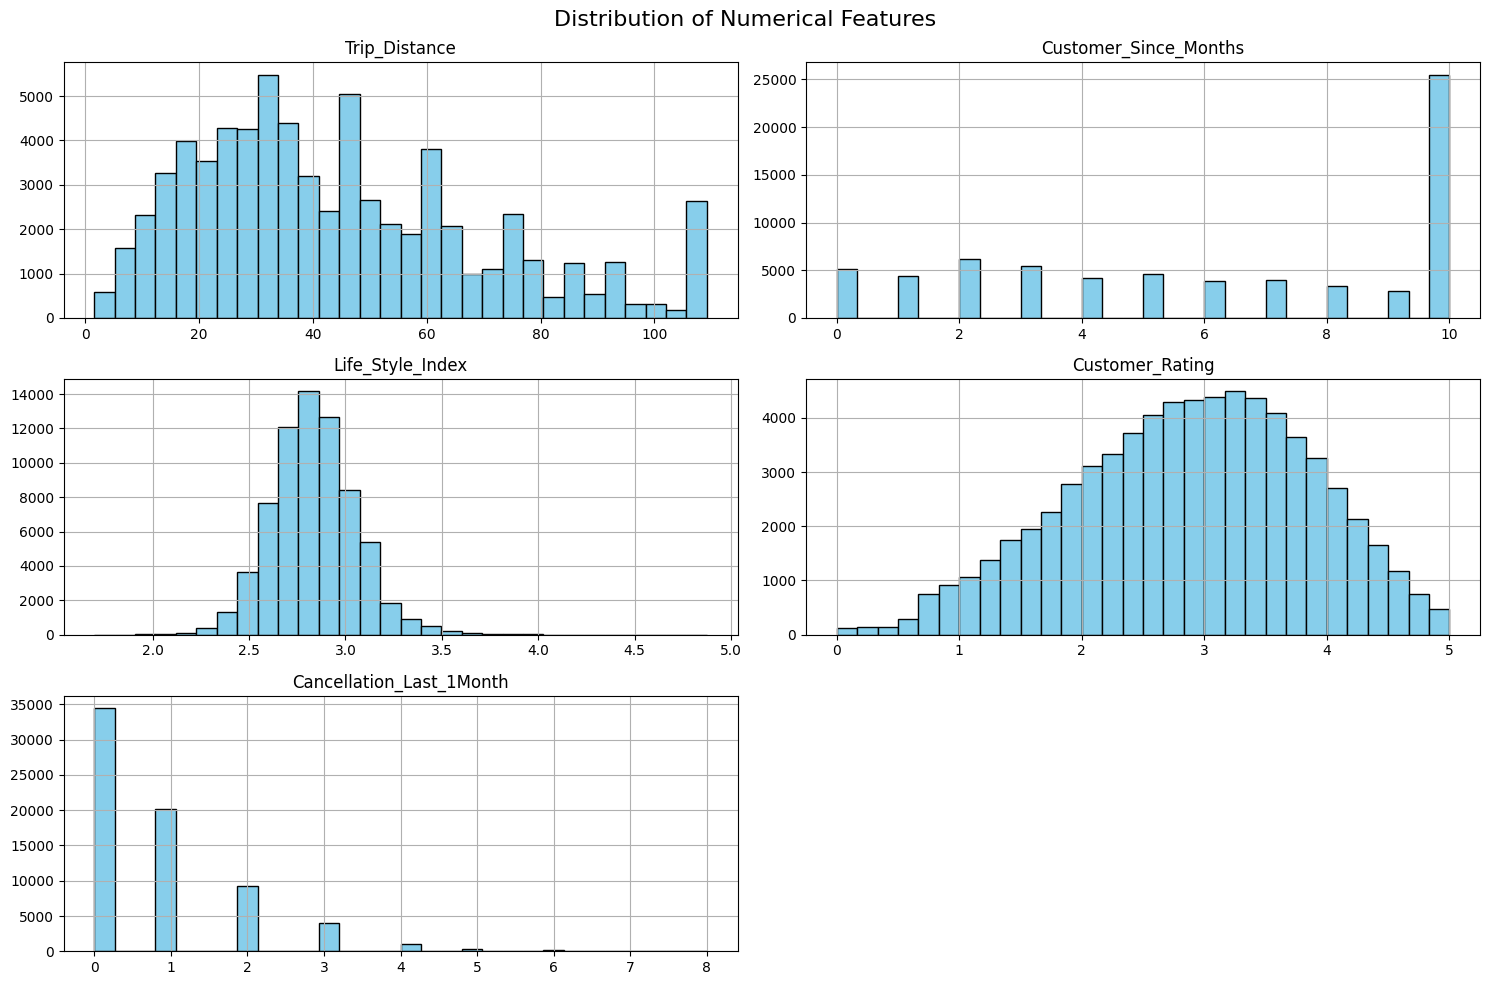

In [24]:
numeric_cols = ["Trip_Distance", "Customer_Since_Months", "Life_Style_Index", "Customer_Rating", "Cancellation_Last_1Month"]

df[numeric_cols].hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

## KMeans Clustering

We use KMeans to group customers based on similar attributes.


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
if "Cluster" in df.columns:
    df = df.drop(columns=["Cluster"])

features = df.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)
print("✅ Clustering done. Here's the breakdown:")
print(df["Cluster"].value_counts())
df.head()

✅ Clustering done. Here's the breakdown:
Cluster
2    30654
0    20529
1    18337
Name: count, dtype: int64


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Cluster
0,6.77,1,1.0,2.42769,0,0,3.9050,0,40.0,46,60,0,2
1,29.47,1,10.0,2.78245,1,0,3.4500,0,38.0,56,78,1,1
4,54.95,2,10.0,3.03453,1,0,3.4025,4,51.0,49,102,1,1
6,29.72,4,10.0,2.83958,2,1,2.9750,1,83.0,50,75,1,0
7,18.44,1,2.0,2.81871,1,0,3.5825,0,103.0,46,63,1,2


In [26]:
# Step: Analyzing Each Cluster Group by Their Feature Averages
# Group the dataset by the Cluster column and get the average of each feature
cluster_summary = df.groupby("Cluster").mean().round(2)
print("Feature-wise averages for each cluster:")
cluster_summary.T
cluster_counts = df["Cluster"].value_counts()
print("Number of users in each cluster:")
print(cluster_counts)


Feature-wise averages for each cluster:
Number of users in each cluster:
Cluster
2    30654
0    20529
1    18337
Name: count, dtype: int64


In [27]:
# Show the cluster profile table (transposed so features go row-wise)
cluster_summary.T
### Feature-wise averages for each cluster

Cluster,0,1,2
Trip_Distance,66.47,45.92,28.10
Type_of_Cab,1.95,1.82,1.74
Customer_Since_Months,6.91,6.56,5.53
Life_Style_Index,3.00,2.85,2.71
Confidence_Life_Style_Index,1.45,1.04,0.71
Destination_Type,0.72,0.71,1.33
Customer_Rating,3.23,2.25,3.02
Cancellation_Last_1Month,0.77,1.12,0.70
Var1,61.01,62.23,66.73
Var2,50.51,57.03,48.97


### Cluster Profiles Summary

**Cluster 0 – Frequent Short-Trippers**
- Lower trip distance but travel often
- Moderate loyalty and customer rating
- May be price-sensitive users
- Focus: Offer short-distance flat pricing, referral bonuses

**Cluster 1 – High-End Loyalists**
- High lifestyle index and confidence
- Older customers with strong ratings
- Likely to use the app regularly
- Focus: Retention campaigns, reward programs

**Cluster 2 – Inconsistent Explorers**
- Highest cancellation rate
- Medium distances and ratings
- Could be testing or undecided users
- Focus: Fix cancellation pain points, promo offers


In [29]:
df.to_csv("clustered_customers.csv", index=False)


C:\Users\91789\AppData\Local\Temp\ipykernel_26928\2003299670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cluster", palette="Set2")


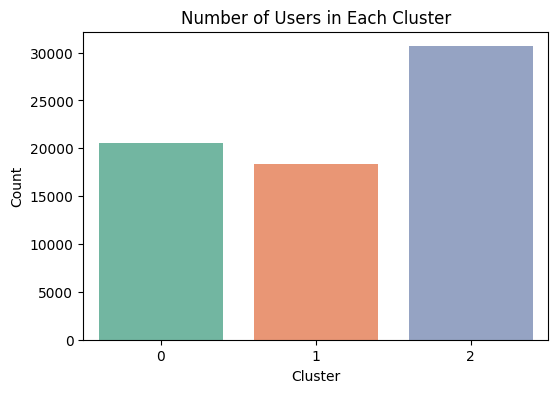

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot showing how many users are in each cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Cluster", palette="Set2")
plt.title("Number of Users in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


C:\Users\91789\AppData\Local\Temp\ipykernel_26928\38098924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=feature, palette="pastel")


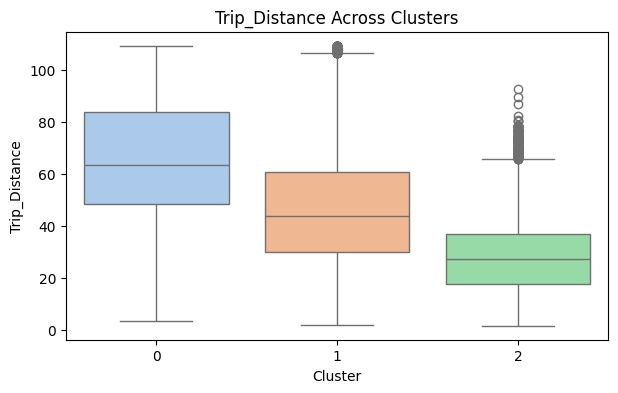

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\38098924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=feature, palette="pastel")


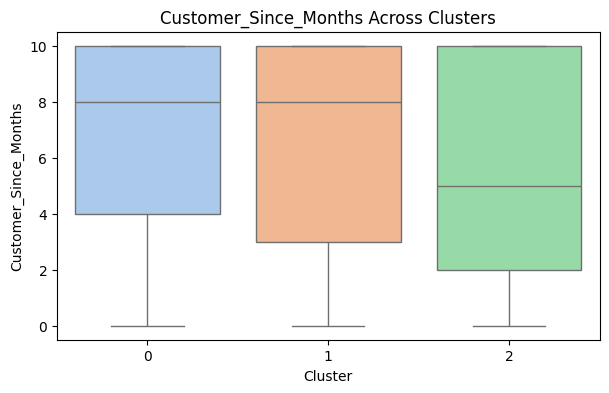

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\38098924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=feature, palette="pastel")


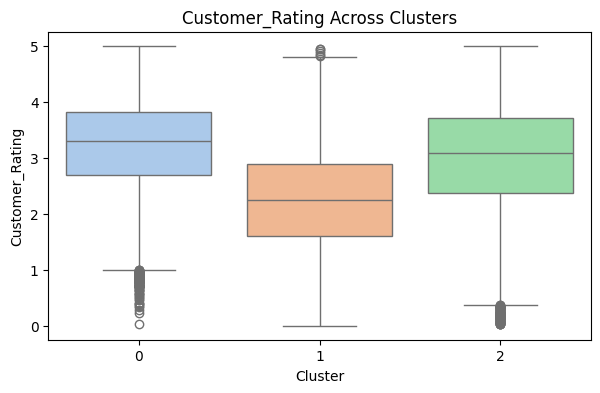

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\38098924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y=feature, palette="pastel")


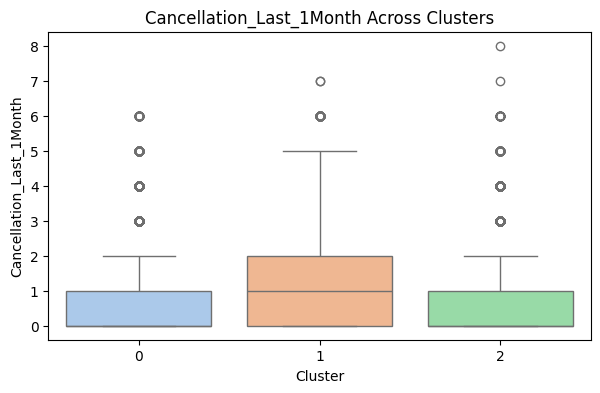

In [31]:
features_to_plot = ["Trip_Distance", "Customer_Since_Months", "Customer_Rating", "Cancellation_Last_1Month"]

for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x="Cluster", y=feature, palette="pastel")
    plt.title(f"{feature} Across Clusters")
    plt.show()


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# First, select the features you want to compare across clusters
features = ["Trip_Distance", "Customer_Since_Months", "Life_Style_Index", 
            "Customer_Rating", "Cancellation_Last_1Month"]
radar_data = cluster_summary[features]
radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())


C:\Users\91789\AppData\Local\Temp\ipykernel_26928\375801228.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91789\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


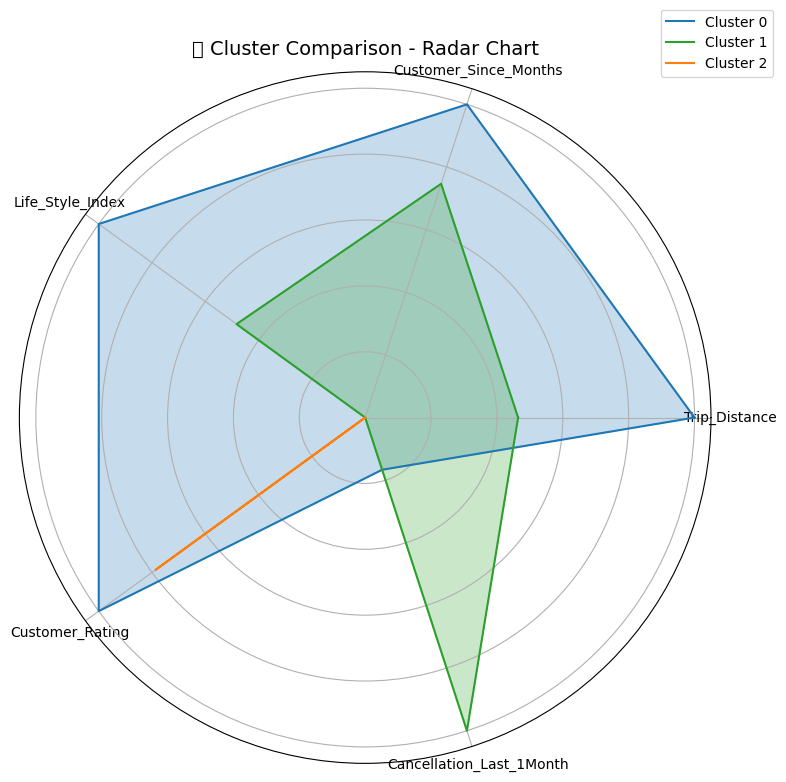

In [34]:
# Define labels and angles
labels = radar_data.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]
for i, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=f"Cluster {i}", color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Set labels and title
ax.set_title("📊 Cluster Comparison - Radar Chart", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


C:\Users\91789\AppData\Local\Temp\ipykernel_26928\3183362612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y=feature, palette="pastel", estimator='mean')


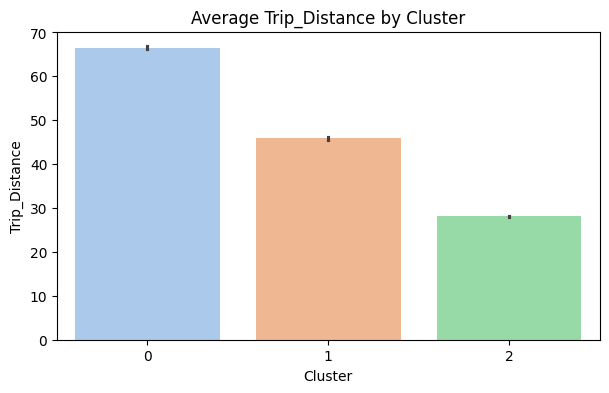

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\3183362612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y=feature, palette="pastel", estimator='mean')


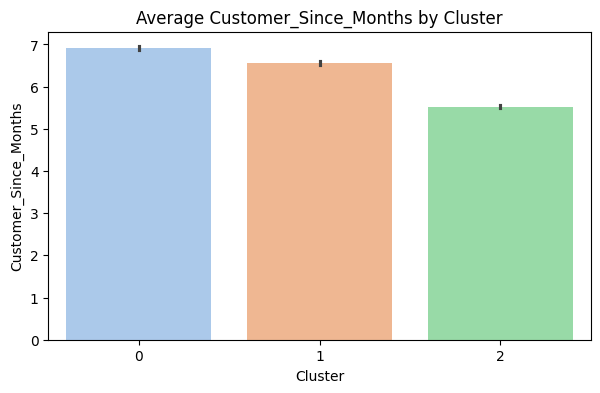

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\3183362612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y=feature, palette="pastel", estimator='mean')


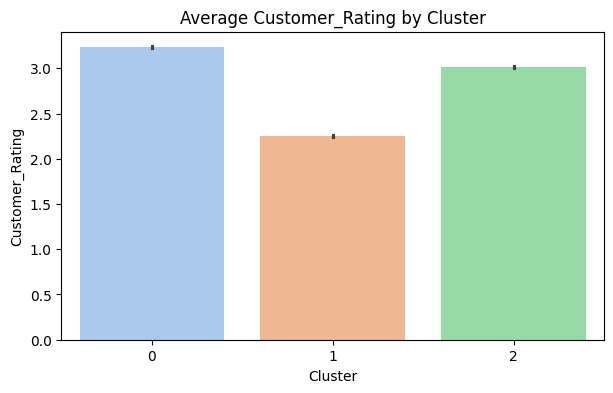

C:\Users\91789\AppData\Local\Temp\ipykernel_26928\3183362612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Cluster", y=feature, palette="pastel", estimator='mean')


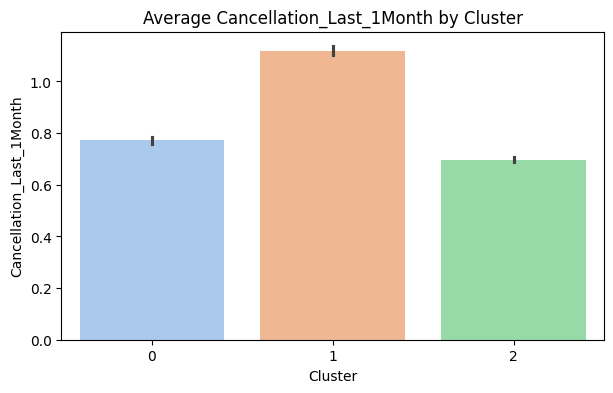

In [36]:
for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=df, x="Cluster", y=feature, palette="pastel", estimator='mean')
    plt.title(f"Average {feature} by Cluster")
    plt.show()


## GMM Clustering (Soft Segmentation)

GMM allows customers to belong to multiple segments with probability scores.
This helps identify “fuzzy” users and target them more intelligently.


In [37]:
from sklearn.mixture import GaussianMixture

# Step 1: Create and fit the GMM model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# Step 2: Predict soft cluster assignments
gmm_clusters = gmm.predict(scaled_data)
gmm_probs = gmm.predict_proba(scaled_data)

# Step 3: Add GMM results to the DataFrame
df["GMM_Cluster"] = gmm_clusters

# Optional: Add max cluster probability as a column (how confidently someone belongs)
df["GMM_Confidence"] = gmm_probs.max(axis=1).round(3)

# Step 4: Preview
print(df[["Cluster", "GMM_Cluster", "GMM_Confidence"]].head())


   Cluster  GMM_Cluster  GMM_Confidence
0        2            1           0.984
1        1            1           0.837
4        1            1           0.977
6        0            0           0.685
7        2            1           0.550


In [38]:
df[df["GMM_Confidence"] < 0.7].head()


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Cluster,GMM_Cluster,GMM_Confidence
6,29.72,4,10.0,2.83958,2,1,2.97500,1,83.0,50,75,1,0,0,0.685
7,18.44,1,2.0,2.81871,1,0,3.58250,0,103.0,46,63,1,2,1,0.550
10,46.07,3,10.0,2.95887,2,1,2.49125,2,89.0,48,69,0,0,2,0.570
12,39.73,1,10.0,2.84870,2,1,3.12875,2,71.0,47,76,1,0,1,0.567
38,12.66,1,6.0,2.70811,1,0,3.12375,0,84.0,48,64,1,2,1,0.605


In [39]:
print("KMeans Clusters:")
print(df["Cluster"].value_counts())

print("\nGMM Clusters:")
print(df["GMM_Cluster"].value_counts())


KMeans Clusters:
Cluster
2    30654
0    20529
1    18337
Name: count, dtype: int64

GMM Clusters:
GMM_Cluster
1    32664
0    22291
2    14565
Name: count, dtype: int64


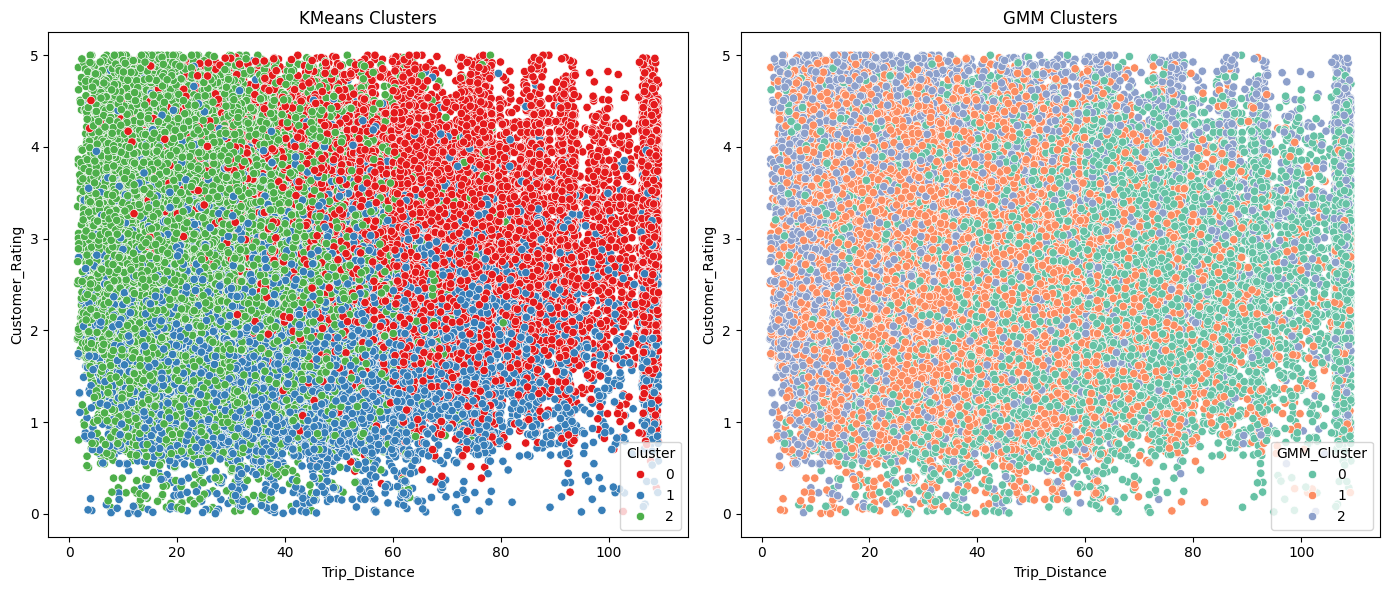

In [40]:
plt.figure(figsize=(14, 6))

# KMeans plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="Trip_Distance", y="Customer_Rating", hue="Cluster", palette="Set1")
plt.title("KMeans Clusters")

# GMM plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="Trip_Distance", y="Customer_Rating", hue="GMM_Cluster", palette="Set2")
plt.title("GMM Clusters")

plt.tight_layout()
plt.show()


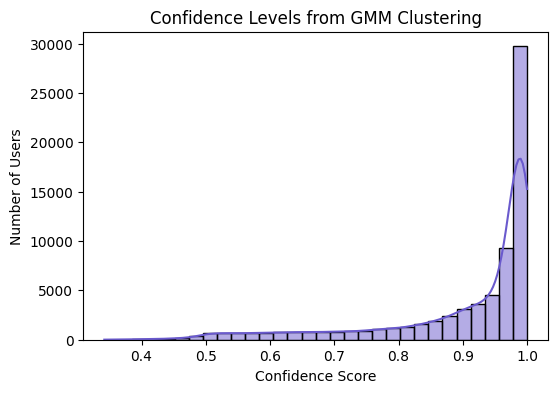

In [41]:
# Distribution of GMM cluster confidence
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="GMM_Confidence", bins=30, color="slateblue", kde=True)
plt.title("Confidence Levels from GMM Clustering")
plt.xlabel("Confidence Score")
plt.ylabel("Number of Users")
plt.show()


Clustering Model Comparison: KMeans vs GMM
We applied both KMeans and Gaussian Mixture Model (GMM) to segment customers based on behavioral and psychographic features.

🔹 KMeans
Assigns each user to only one cluster (hard assignment)

Fast and simple, but can miss overlap between clusters

Best for clean, well-separated data

🔹 GMM
Assigns probabilities of belonging to each cluster (soft assignment)

Captures overlapping behavior — useful when user behavior is not strictly separable

Helps identify uncertain users through confidence scores

✅ Observation:
Cluster structures were similar in shape but GMM revealed fuzzier users

Histogram of GMM confidence shows that ~X% users had <70% confidence, meaning they didn’t clearly belong to any one segment

GMM is more suitable for nuanced strategy planning

> Based on our comparison, we decided to use **GMM clustering** for our final segmentation.  
> It captures user behavior more realistically, allows for soft boundaries between clusters, and gives us the flexibility to design offers based on user confidence levels.


In [43]:
# Check average values per GMM cluster
gmm_profile = df.groupby("GMM_Cluster").mean().round(2)
gmm_profile.T


GMM_Cluster,0,1,2
Trip_Distance,57.26,37.93,37.93
Type_of_Cab,1.89,1.71,1.97
Customer_Since_Months,6.41,6.14,6.05
Life_Style_Index,2.86,2.80,2.87
Confidence_Life_Style_Index,1.66,0.59,0.99
Destination_Type,0.25,0.24,3.80
Customer_Rating,2.74,2.84,3.19
Cancellation_Last_1Month,0.30,1.11,1.02
Var1,63.61,64.13,63.60
Var2,51.15,52.28,50.53


In [44]:
import pandas as pd
df = pd.read_csv("clustered_customers.csv")  


In [46]:

df.to_csv("final_clustered_data.csv", index=False)
print("✅ Final dataset saved as 'final_clustered_data.csv'")


✅ Final dataset saved as 'final_clustered_data.csv'


## Final Summary

This notebook performed:
- Data collection and merging from multiple sources
- Preprocessing and exploratory data analysis
- Clustering using both KMeans and Gaussian Mixture Models
- Visualization of clusters and interpretation
- Final strategy to target market segments using soft clustering
## Conclusion

- We discovered 3 customer segments using both hard (KMeans) and soft (GMM) clustering.
- GMM was selected as the final model due to its ability to handle overlapping behavior.
- The dataset is now ready for strategy development and report writing.

